# UEFA Women's Euro 2022 Final - Analysis

Note: we will be using non-structured, hacky code to build the visualisations, and then generalise to classes if needed afterwards.


In [2]:
import matplotlib.pyplot as plt

from utils.match import Match

match_id = 3847567
final = Match(match_id=match_id)

## Timeline of events

We would like to get a view of when each team had offensive and defensive events. First, we classify events into offensive and defensive types:

In [3]:
offensive_good_event_types = ["Pass", "Ball Receipt*", "Carry", "Dribble", "Shot", "Goal Keeper", "Foul Won"]
offensive_bad_event_types = ["Miscontrol", "Disposessed", "Offside"]
defensive_good_event_types = ["Clearance", "Pressure", "Ball Recovery", "Interception", "Block",]
defensive_bad_event_types = ["Dribbled Past", "Foul Committed", "Error", "Bad Behaviour"]
neutral_event_types = ["Starting XI", "Half Start", "Injury Stoppage", "50/50", "Half End", "Substitution", "Tactical Shift", "Player Off", "Player On"]

Then, we plot the events per team as the match goes on.

In [4]:
england_events = final.events.loc[final.events["team"] == "England Women's"]
germany_events = final.events.loc[final.events["team"] == "Germany Women's"]

england_offensive_good_events = england_events.loc[england_events["type"].isin(offensive_good_event_types)]
england_offensive_bad_events = england_events.loc[england_events["type"].isin(offensive_bad_event_types)]
england_defensive_good_events = england_events.loc[england_events["type"].isin(defensive_good_event_types)]
england_defensive_bad_events = england_events.loc[england_events["type"].isin(defensive_bad_event_types)]

germany_offensive_good_events = germany_events.loc[germany_events["type"].isin(offensive_good_event_types)]
germany_offensive_bad_events = germany_events.loc[germany_events["type"].isin(offensive_bad_event_types)]
germany_defensive_good_events = germany_events.loc[germany_events["type"].isin(defensive_good_event_types)]
germany_defensive_bad_events = germany_events.loc[germany_events["type"].isin(defensive_bad_event_types)]

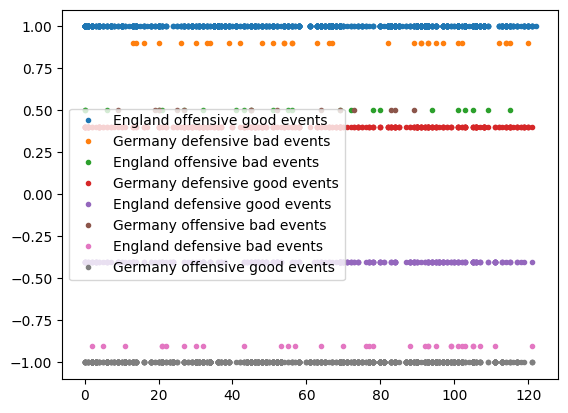

In [5]:
plt.plot(england_offensive_good_events["minute"], [1]*len(england_offensive_good_events),'.')
plt.plot(germany_defensive_bad_events["minute"], [0.9]*len(germany_defensive_bad_events), '.')

plt.plot(england_offensive_bad_events["minute"], [0.5]*len(england_offensive_bad_events),'.')
plt.plot(germany_defensive_good_events["minute"], [0.4]*len(germany_defensive_good_events), '.')

plt.plot(england_defensive_good_events["minute"], [-0.4]*len(england_defensive_good_events),'.')
plt.plot(germany_offensive_bad_events["minute"], [0.5]*len(germany_offensive_bad_events), '.')

plt.plot(england_defensive_bad_events["minute"], [-0.9]* len(england_defensive_bad_events),'.')
plt.plot(germany_offensive_good_events["minute"], [-1]*len(germany_offensive_good_events), '.')

plt.legend(["England offensive good events", "Germany defensive bad events", "England offensive bad events", "Germany defensive good events", "England defensive good events", "Germany offensive bad events", "England defensive bad events", "Germany offensive good events"])

Maybe we can focus only on the first 20 minutes to make it more manageable.

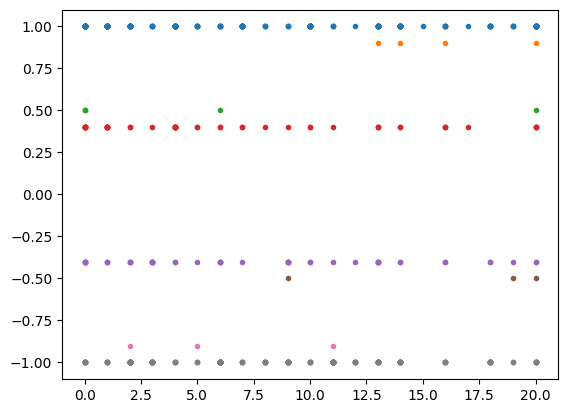

In [7]:
start_min, end_min = 0, 20
def select_events_in_duration(events, start_min, end_min):
    return events.loc[events["minute"].between(start_min, end_min)]

def plot_events_over_minutes(events, y_value):
    plt.plot(events["minute"], [y_value]*len(events), '.')
    
event_dataframes = [england_offensive_good_events, germany_defensive_bad_events, england_offensive_bad_events, germany_defensive_good_events, england_defensive_good_events, germany_offensive_bad_events, england_defensive_bad_events, germany_offensive_good_events]
y_values = [1, 0.9, 0.5, 0.4, -0.4, -0.5, -0.9, -1]

for index, event_dataframe in enumerate(event_dataframes):
    plot_events_over_minutes(select_events_in_duration(event_dataframe, start_min, end_min), y_value=y_values[index])

# plt.legend(["England offensive good events", "Germany defensive bad events", "England offensive bad events", "Germany defensive good events", "England defensive good events", "Germany offensive bad events", "England defensive bad events", "Germany offensive good events"])